# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds3001f25/eda_assignment.git`
### Do Q1, Q2, and Q3.

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?

In [5]:
# Question 2.1/2.2

import numpy as np
import pandas as pd

airbnb = pd.read_csv("airbnb_hw.csv")

print(airbnb.shape)
# The dimensions are 30478 rows by 13 columns. This means that there are 30,478
# observations.

print(airbnb.columns)
# The variables included are 'Host Id', 'Host Since', 'Name', 'Neighbourhood ',
#'Property Type','Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
# 'Number of Records', 'Number Of Reviews', 'Price','Review Scores Rating.'


(30478, 13)
Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object')


In [6]:
# Question 2.3
# Cross tabulate Room Type and Property Type. What patterns do you see in what
# kinds of rentals are available? For which kinds of properties are private
# rooms more common than renting the entire property?

ct = pd.crosstab(airbnb["Property Type"], airbnb["Room Type"])
print(ct)
# The data shows that more conventional living situations (apartments, houses,
# lofts, townhouses, condos, etc.) have the greatest availability. It also that
# these more popular types of living situations have the greatest availability
# by the room types which allow for the most privacy/autonomy. For instance, the
# property type "Apartment" has the greatest number of available units when they
# have the room type of "Entire home/apt". For most other popular property types
# that I've mentioned, the "Entire home/apt" room type has the greatest availability
# as well. As we might expect based on this observation, the next most available
# "room type" for the apartment property type is a "private room". However, this
# is not universally the case. For instance, in a property type where renting an
# entire unit is not expected (like "House" or "Bed & Breakfast"), we do not see
# them having the greatest availability in the room type "Entire home/apt" as we
# did with the other common property types. In fact, "House", "Bed & Breakfast,
# "Dorm", and "Hut" all have more listings of "Private rooms" than "Entire home/apt".
# This could have been reasonably expected as these property types are typically
# occupied simoultaneously by many different renters.

Room Type        Entire home/apt  Private room  Shared room
Property Type                                              
Apartment                  15669         10748          685
Bed & Breakfast               13           155           12
Boat                           7             1            0
Bungalow                       4             0            0
Cabin                          1             1            0
Camper/RV                      6             1            0
Castle                         0             1            0
Chalet                         0             1            0
Condominium                   72            22            0
Dorm                           4            16           11
House                        752          1258           80
Hut                            0             2            0
Lighthouse                     1             0            0
Loft                         392           312           49
Other                         14        

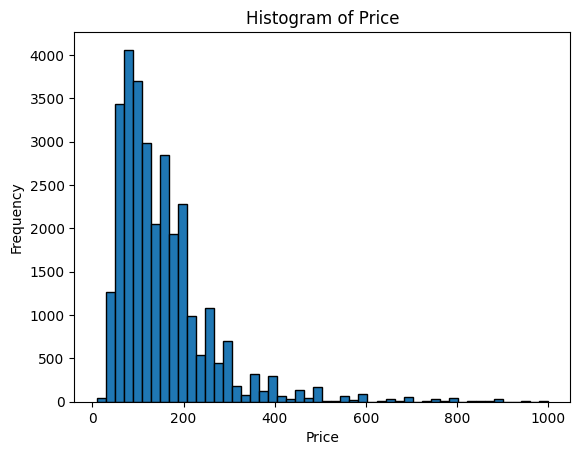

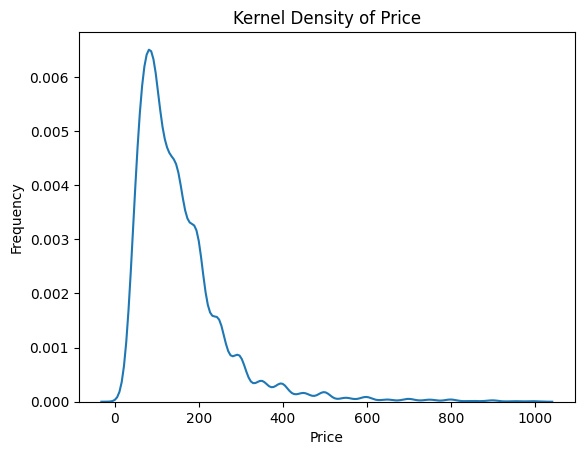

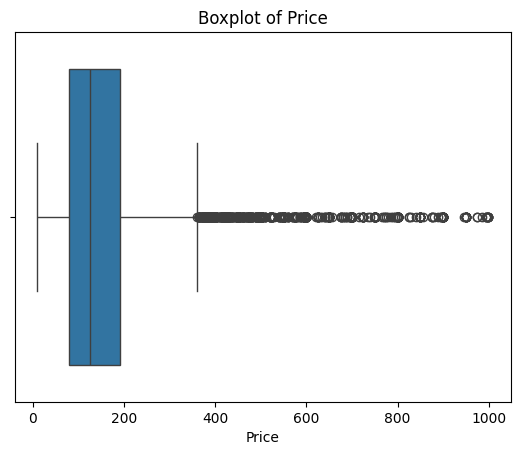

count    30297.000000
mean       153.357032
std        108.895698
min         10.000000
25%         80.000000
50%        125.000000
75%        192.000000
max        999.000000
Name: Price, dtype: float64


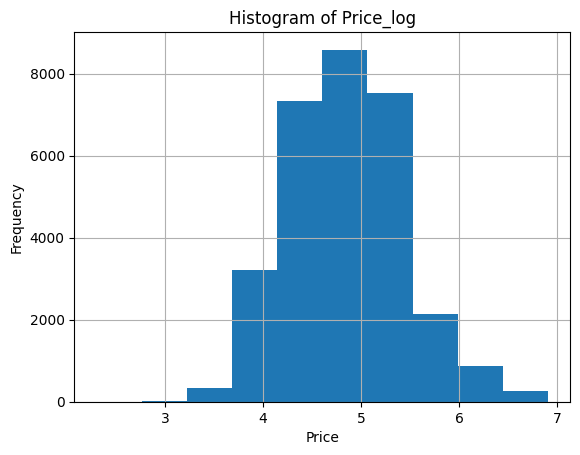

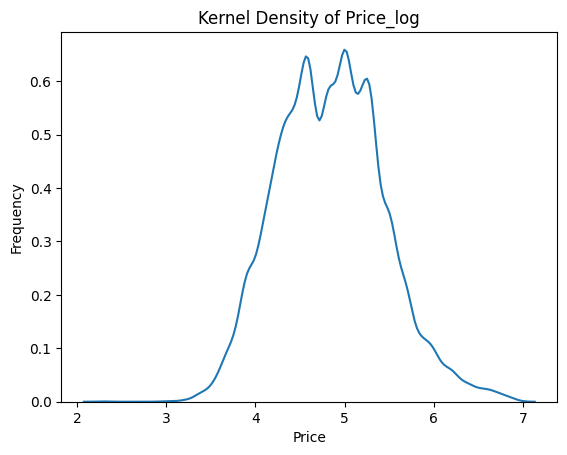

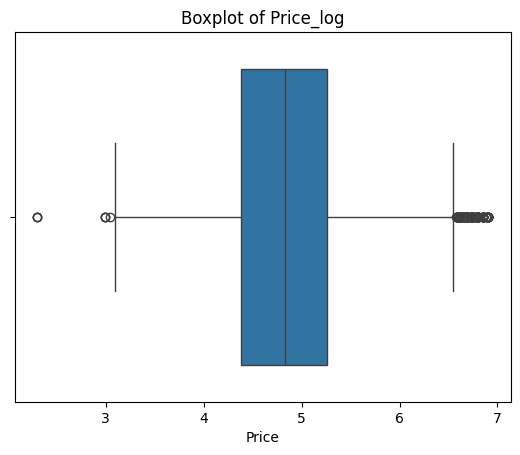

count    30297.000000
mean         4.845370
std          0.596999
min          2.302585
25%          4.382027
50%          4.828314
75%          5.257495
max          6.906755
Name: price_log, dtype: float64


In [50]:
# Question 2.4 For Price, make a histogram, kernel density, box plot, and a
# statistical description of the variable. Are the data badly scaled? Are there
# many outliers? Use log to transform price into a new variable, price_log, and
# take these steps again.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

airbnb["Price"] = pd.to_numeric(airbnb["Price"], errors='coerce')

histogram = airbnb["Price"].hist(bins=50, grid = False, edgecolor="black")
histogram.set(title = "Histogram of Price",
xlabel = "Price",
ylabel = "Frequency")
plt.show()

kernel = sns.kdeplot(airbnb["Price"])
kernel.set(title = "Kernel Density of Price",
xlabel = "Price",
ylabel = "Frequency")
plt.show()

box = sns.boxplot(data=airbnb, x="Price")
box.set(title = "Boxplot of Price")
plt.show()

print(airbnb["Price"].describe())

# The data are not well scaled. The boxplot shows us this the best - there are
# many data points outside the top "whisker" which shows use many outliers.
# On the other two graphs the like the Histogram and Kernel Density plot, there
# is a large range, meaning that values that have a lower frequency are difficult
# to see on the graph and compare to the values with higher frequencies.

airbnb["price_log"] = np.log(airbnb["Price"])

histogram2 = airbnb["price_log"].hist()
histogram2.set(title = "Histogram of Price_log",
xlabel = "Price",
ylabel = "Frequency")
plt.show()


kernel2 = sns.kdeplot(airbnb["price_log"])
kernel2.set(title = "Kernel Density of Price_log",
xlabel = "Price",
ylabel = "Frequency")
plt.show()

box2 = sns.boxplot(x=airbnb["price_log"])
box2.set(title = "Boxplot of Price_log",
xlabel = "Price")
plt.show()

print(airbnb["price_log"].describe())



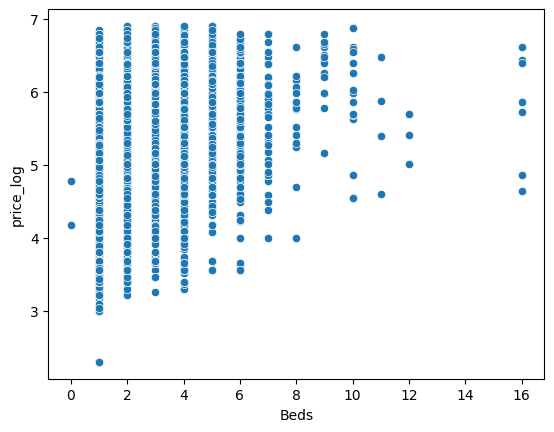

          mean       std
Beds                    
0.0   4.476755  0.427613
1.0   4.682084  0.527569
2.0   5.077679  0.546961
3.0   5.297638  0.572851
4.0   5.438240  0.666451
5.0   5.596976  0.624868
6.0   5.538625  0.712393
7.0   5.617009  0.693481
8.0   5.674340  0.579810
9.0   6.297723  0.444839
10.0  5.878112  0.737968
11.0  5.589773  0.791877
12.0  5.376839  0.348237
16.0  5.801986  0.722260


In [52]:
# Questions 2.5 Make a scatterplot of price_log and Beds. Describe what you see.
# Use .groupby() to compute a desciption of Price conditional on/grouped by the
# number of beds. Describe any patterns you see in the average price and standard
# deviation in prices.

sns.scatterplot(data=airbnb,x="Beds",y="price_log")
plt.show()
# I see a scatter plot with the values of each bed matched with their corresponding
# price bunching up greatly. It shows that properties with 1 to 4 beds generally
# have a similar distribution in the prices for properties containing that number of beds.
# Put simply, propertied with 1 bed have a similar spread of prices as those of
# properties with 4 beds. After 4 beds this similarity changes. After 4 beds, the general
# concentration of prices shifts higher as the number of bed increases.

beds_grouped = airbnb.groupby("Beds")["price_log"].describe()
print(beds_grouped[["mean", "std"]])
# The groupby() analysis displays a positive correlation between average price and
# the number of bed -- the average price increases along with the number of
# bed. The average price peaks at 9 beds, and the subsequent numbers of beds drops
# back down. There exists no data between 12 and 16 beds, however. The standard
# deviation shows less of a trend. There is a general increase in std as the number of
# bed increased, but with greater variability. There are several "dips" along this
# general positive correlation. For instance, 8 beds has an std of 0.579, 9 beds
# has one of 0.444, but then it increases again at 10 beds as it has an std of 0.737.



In [ ]:
# Question 2.6 Make a scatterplot of price_log and Beds, but color the graph by
# Room Type and Property Type. What patterns do you see? Compute a description
# of Price conditional on Room Type and Property Type. Which Room Type and Property
# Type have the highest prices on average? Which have the highest standard deviation?
# Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?



**Q3.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.